In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('ds.csv')
df =df.drop(['Age','Gender'],axis=1)
df.sample(5)

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
230,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
294,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39,1,0,1,1,1,0,0,0,0,1,0,0,0,0,1
292,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0


In [3]:
nan_data = df[df.isna().any(axis=1)]
nan_data

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Polyuria            520 non-null    int64
 1   Polydipsia          520 non-null    int64
 2   sudden weight loss  520 non-null    int64
 3   weakness            520 non-null    int64
 4   Polyphagia          520 non-null    int64
 5   Genital thrush      520 non-null    int64
 6   visual blurring     520 non-null    int64
 7   Itching             520 non-null    int64
 8   Irritability        520 non-null    int64
 9   delayed healing     520 non-null    int64
 10  partial paresis     520 non-null    int64
 11  muscle stiffness    520 non-null    int64
 12  Alopecia            520 non-null    int64
 13  Obesity             520 non-null    int64
 14  class               520 non-null    int64
dtypes: int64(15)
memory usage: 61.1 KB


In [5]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)
for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [6]:
numerical

[]

In [7]:
catgcols

['Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'class']

In [8]:
df['class'].value_counts()

class
1    320
0    200
Name: count, dtype: int64

In [9]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

In [10]:
df[dep_col].value_counts()

class
1    320
0    200
Name: count, dtype: int64

Transformasi dataset

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [12]:
df['class'] = le.fit_transform(df['class'])

In [13]:
x = df[ind_col] #feature
y = df[dep_col] #Label

In [14]:
df.head()

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [15]:
df.to_csv('ds_num.csv', index=False)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.30,random_state=0)

Membuat Model decision tree

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

dtc_fix = dtc.fit(x_train,y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))
print(f"Akurasi data training = { accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Akurasi data testing = {dtc_acc}\n")
print(f"confusion matrix : \n {confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn,fp, fn, tp =confusion.ravel()
print(f"classification repot : \n {classification_report(y_test, dtc.predict(x_test))}")


Akurasi data training = 0.8956043956043956
Akurasi data testing = 0.9038461538461539

confusion matrix : 
 [[57  5]
 [10 84]]

classification repot : 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        62
           1       0.94      0.89      0.92        94

    accuracy                           0.90       156
   macro avg       0.90      0.91      0.90       156
weighted avg       0.91      0.90      0.90       156



In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
# Accuracy
rf.score(x_test,y_test)

0.967948717948718

In [19]:
# Support Vector Classifier
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
# Accuracy
model.score(x_test,y_test)

0.967948717948718

In [20]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
# Accuracy
knn.score(x_test,y_test)

0.9038461538461539

## simulasi Model

In [21]:
input_data  = (	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0)	
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshape)
print(prediction)

if(prediction[0]==1):
    print ('Pasien Positif Diabetes')
else:
    print ('Pasien Negatif Diabetes')

[0]
Pasien Negatif Diabetes


c:\Users\Depi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


visualisasi pohon keputusan

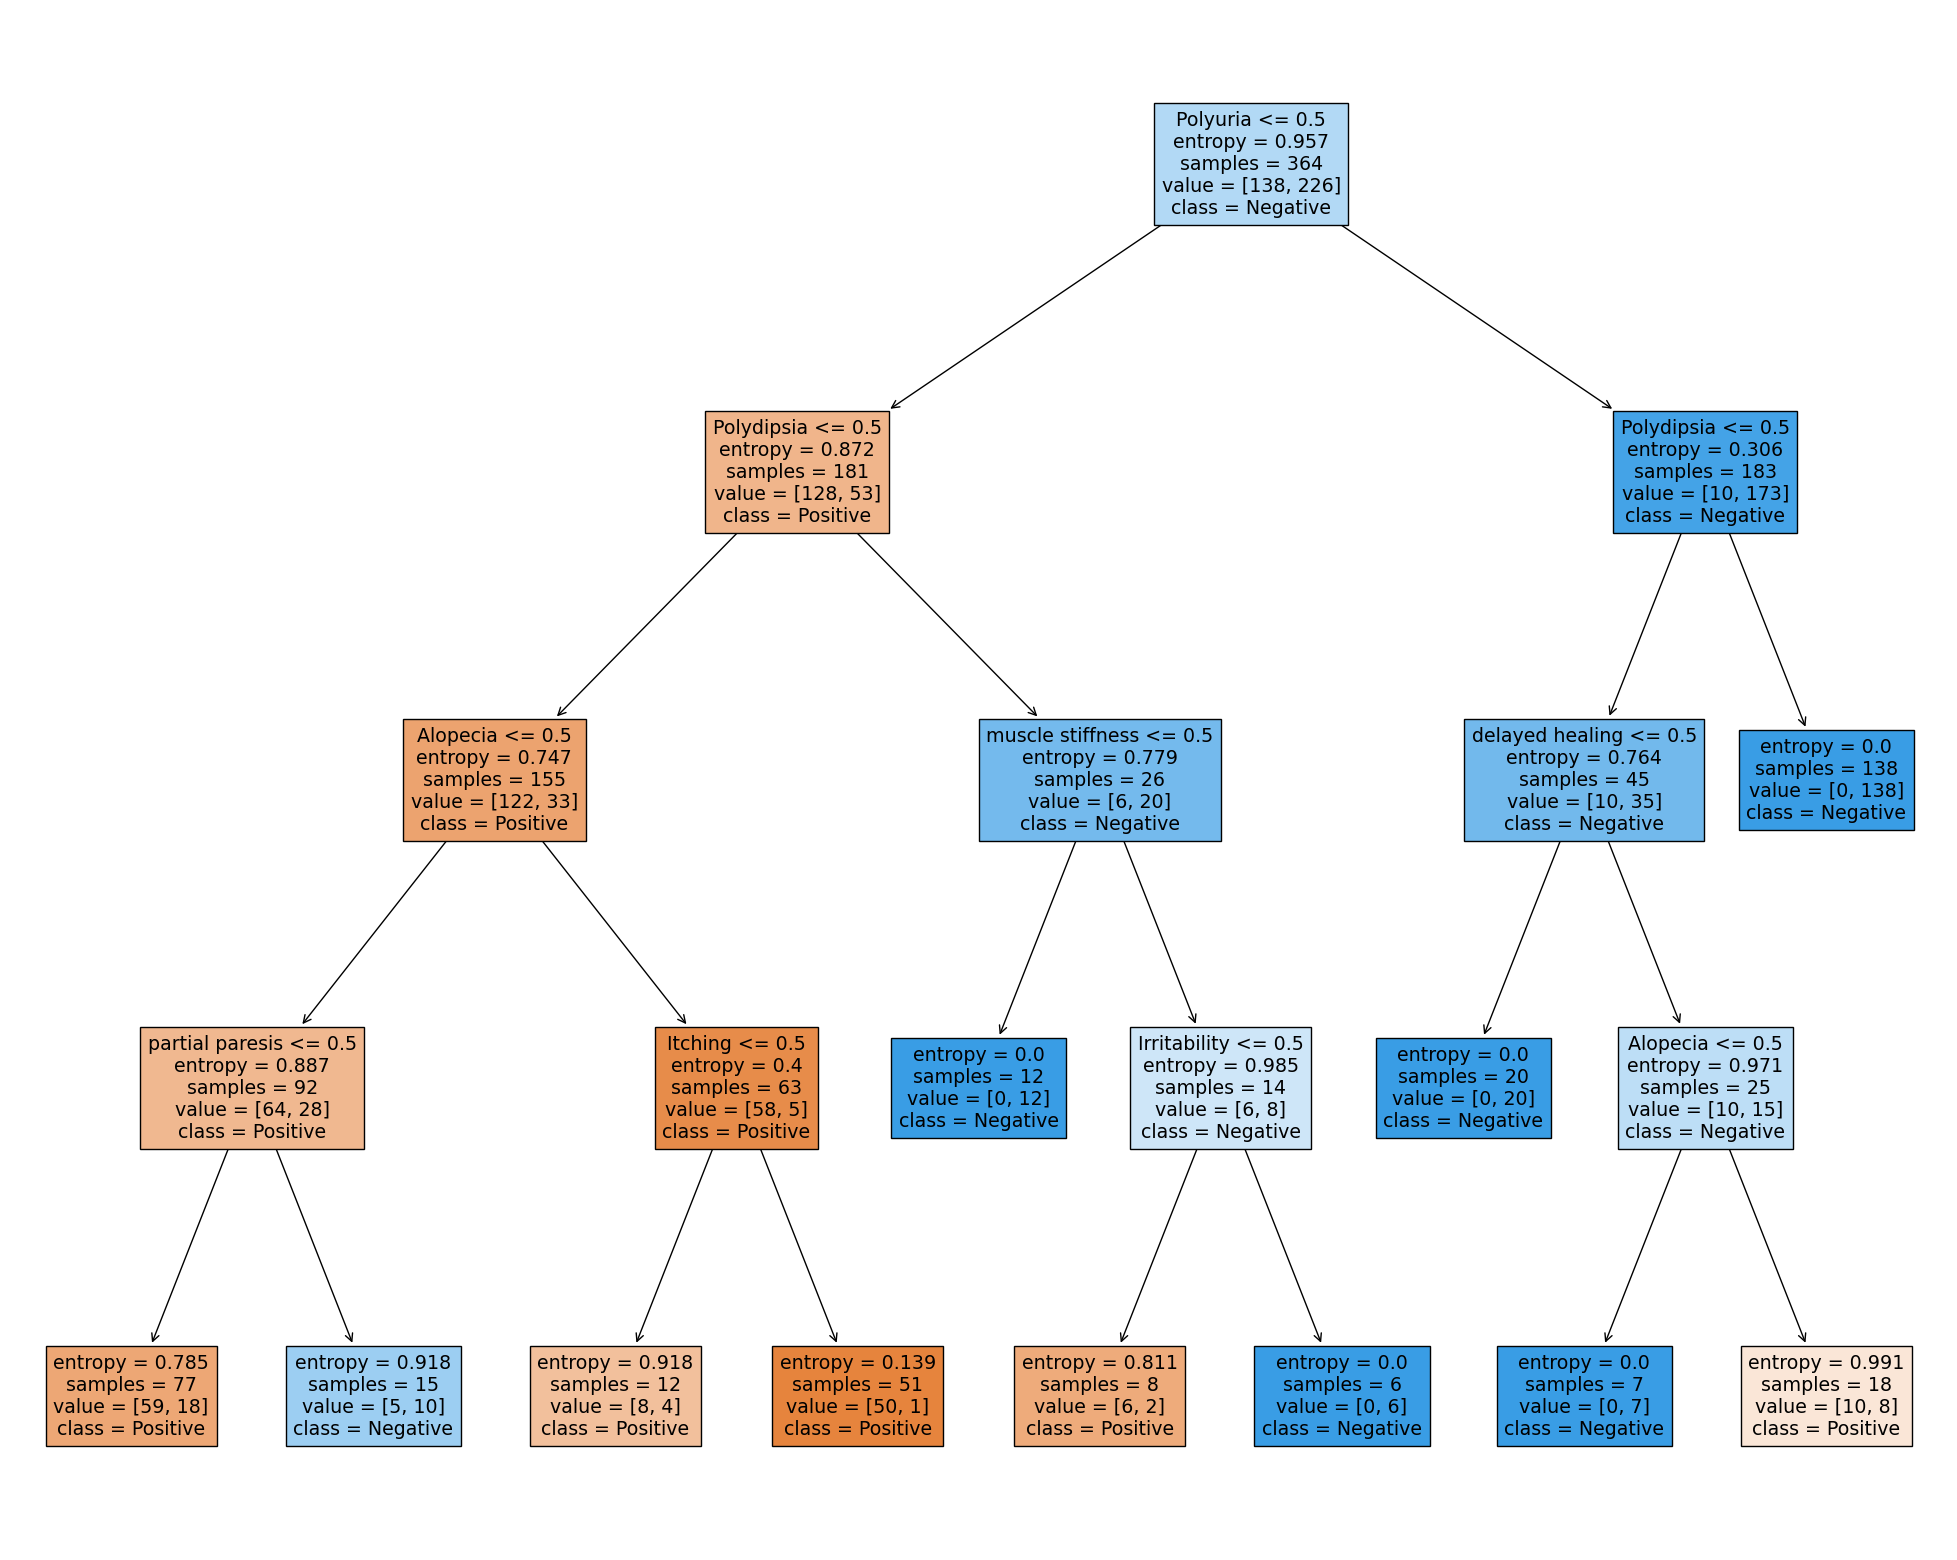

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc_fix,
                   feature_names=ind_col,
                   class_names=['Positive','Negative'],
                   filled=True)

In [23]:
import pickle

In [24]:
filename = 'knn.sav'
pickle.dump(knn,open(filename,'wb'))

In [25]:
filename = 'svc.sav'
pickle.dump(model,open(filename,'wb'))

In [26]:
filename = 'rf.sav'
pickle.dump(rf,open(filename,'wb'))

In [27]:
filename = 'decision.sav'
pickle.dump(model,open(filename,'wb'))